In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import seaborn as sns

In [3]:
global mu10,mu20,mu1,mu2,gamma,D,eta,kappa

In [4]:
def TwoSpecies(y,t):
    s1=y[0]
    s2=y[1]
    dydt=[mu1*s1*(1-s1-gamma*s2)-D*s1,
        mu2*s2*(1-s2-gamma*s1)-D*s2]
    return dydt

In [5]:
def TwoSpeciesHGT(y,t):
    s1=y[0]
    s2=y[1]
    p1=y[2]
    p2=y[3]
    lambda1=mu1/mu10-1
    lambda2=mu2/mu20-1
    dydt=[mu1/s1*(s1+lambda2*p1)*s1*(1-s1-gamma*s2)-D*s1,
        mu2/s2*(s2+lambda1*p2)*s2*(1-gamma*s1-s2)-D*s2,
        mu1*(1+lambda2)*p1*(1-s1-gamma*s2)+eta*(s2+p1)*(s1-p1)-kappa*p1-D*p1,
        mu2*(1+lambda1)*p2*(1-gamma*s1-s2)+eta*(s1+p2)*(s2-p2)-kappa*p2-D*p2]
    return dydt

In [6]:
gamma=0.99
D=0.2
eta=0.1
kappa=0.005

mu1s=np.arange(0,1.002,0.002)
mu2s=np.arange(0,1.002,0.002)
mu10=0.5
mu20=0.5
initial=[0.5,0.5]
initialHGT=[0.5,0.5,0,0]
timespan=np.arange(0,80.1,0.1)
S1Abun=np.zeros((len(mu1s),len(mu2s)))
S2Abun=np.zeros((len(mu1s),len(mu2s)))
S1AbunHGT=np.zeros((len(mu1s),len(mu2s)))
S2AbunHGT=np.zeros((len(mu1s),len(mu2s)))

thresh=0.01

In [7]:
for i in range(len(mu1s)):
    mu1=mu1s[i]
    for j in range(len(mu2s)):
        mu2=mu2s[j]
        y1=odeint(TwoSpecies,initial,timespan)
        y2=odeint(TwoSpeciesHGT,initialHGT,timespan)
        S1Abun[i,j]=y1[-1,0]
        S2Abun[i,j]=y1[-1,1]
        S1AbunHGT[i,j]=y2[-1,0]
        S2AbunHGT[i,j]=y2[-1,1]

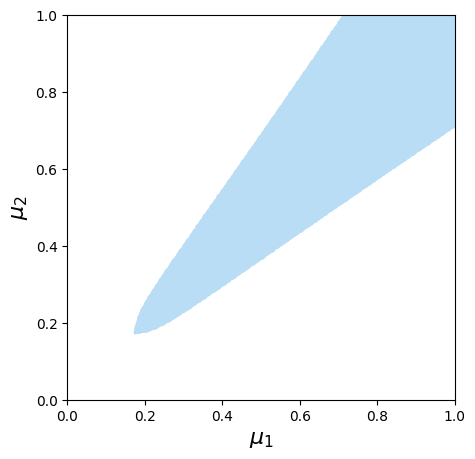

In [8]:
plt.figure(figsize=(5,5))
XX=S1Abun
YY=S2Abun
for i in range(len(mu1s)):
    for j in range(len(mu2s)):
        if min(XX[i,j],YY[i,j])>thresh:
            plt.plot(mu1s[i],mu2s[j],'o',markersize=2,color=np.divide([186,222,245],256))
plt.xlabel('$\mu_1$',fontsize=16)
plt.ylabel('$\mu_2$',fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.savefig('PhaseDiagram_NoHGT.pdf')
plt.savefig('PhaseDiagram_NoHGT.jpg',dpi=1000)
plt.show()

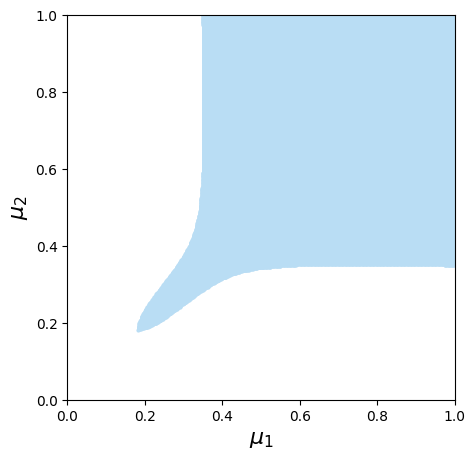

In [9]:
plt.figure(figsize=(5,5))
XX=S1AbunHGT
YY=S2AbunHGT
for i in range(len(mu1s)):
    for j in range(len(mu2s)):
        if min(XX[i,j],YY[i,j])>thresh:
            plt.plot(mu1s[i],mu2s[j],'o',markersize=2,color=np.divide([186,222,245],256))
plt.xlabel('$\mu_1$',fontsize=16)
plt.ylabel('$\mu_2$',fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.savefig('PhaseDiagram_WithHGT.pdf')
plt.savefig('PhaseDiagram_WithHGT.jpg',dpi=1000)
plt.show()